# Dimensionality Reduction

## 1. Introduction to Dimensionality Reduction

### What is Dimensionality Reduction?

In the realm of machine learning and data analysis, we frequently work with datasets that have a high number of features (dimensions). While more features can potentially provide more information, high-dimensional data often presents several challenges:

- **Curse of Dimensionality**: As the number of dimensions increases, the volume of the feature space grows exponentially, making the data sparse. This sparsity can degrade the performance of machine learning algorithms, as they struggle to find patterns in the data.
- **Computational Complexity**: High-dimensional data increases the computational cost and time for processing and modeling.
- **Overfitting**: Models trained on high-dimensional data can overfit, capturing noise instead of the underlying patterns.
- **Difficulty in Visualization**: Visualizing data beyond three dimensions is non-trivial, limiting our ability to intuitively understand and explore the data.

**Dimensionality Reduction** refers to the process of reducing the number of input variables in a dataset while preserving as much information as possible. This simplification helps in making the data more manageable and can improve the performance of machine learning models.

Dimensionality reduction techniques are broadly categorized into:

- **Feature Selection**: Selecting a subset of the most significant features.
- **Feature Extraction**: Transforming the data into a lower-dimensional space (e.g., using PCA) by creating new features that are combinations of the original features.

## 2. Applications of Dimensionality Reduction

Dimensionality reduction has several crucial applications and we will explore the following applications:

- **Data Visualization**: By reducing data to two or three dimensions, we can create visual representations that help in identifying patterns, clusters, and outliers.
- **Noise Reduction**: Eliminating less important features can reduce noise, leading to cleaner data and better model performance.
- **Feature Extraction**: Helps in identifying and combining features that capture the most variance in the data.
- **Speeding Up Algorithms**: Simplifying data reduces computational requirements, leading to faster training and prediction times.
- **Preventing Overfitting**: Reducing the number of features decreases model complexity, which can prevent overfitting and improve generalization to new data.

### 2.1 Data Visualization

**Dataset**: MNIST Handwritten Digits Dataset

**Description**:

The MNIST dataset consists of 70,000 images of handwritten digits (0-9), each of size 28x28 pixels, resulting in a 784-dimensional feature space. Visualizing this high-dimensional data is challenging.

**Objective**:

- Use PCA to reduce the dimensionality of the MNIST dataset from 784 to 2 dimensions.
- Visualize the data in 2D to observe patterns and clusters.

**Visualization**:

![MNIST PCA Visualization](archive/mnist_pca_visualizations.png)

### 2.2 Noise Reduction

**Dataset**: Fashion MNIST Dataset with Added Noise

**Description**:

The Fashion MNIST dataset is similar to MNIST but contains images of clothing items. We'll add noise to the images and use PCA to reconstruct them, effectively reducing noise.

**Objective**:

- Add Gaussian noise to the images.
- Use PCA to reconstruct the images from a reduced number of components.
- Compare original, noisy, and reconstructed images to observe noise reduction.

**Visualization**:

![Fashion MNIST Noise Reduction](archive/fashion_mnist_noise_reduction.png)

### 2.3 Feature Extraction

**Dataset**: Labeled Faces in the Wild (LFW)

**Description**:

The LFW dataset consists of images of faces collected from the web. Each face is represented by high-dimensional pixel data.

**Objective**:

- Use PCA to extract principal components known as "eigenfaces".
- Visualize the eigenfaces to understand the most significant features in the dataset.

**Visualization**:

![LFW Eigenfaces](archive/lfw_eigenfaces.png)

## 3. PCA: Principal Component Analysis

### Understanding PCA

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variability (information) as possible. It transforms the original data into a new coordinate system where the greatest variances lie on the first coordinates (principal components), the second greatest variances on the second coordinates, and so on.

### **Goal**

Find the directions (principal components) that maximize the variance in the data.

### **Process Overview**

1. **Standardize the Data**: Center and scale the data.
2. **Compute the Covariance Matrix**.
3. **Calculate Eigenvalues and Eigenvectors**.
4. **Sort Eigenvectors**: Based on eigenvalues in descending order.
5. **Project Data**: Onto the selected principal components.

### Dataset Description: Fashion MNIST

The **Fashion MNIST** dataset is a popular alternative to the original MNIST dataset of handwritten digits. It contains 70,000 grayscale images of fashion items, each of size 28x28 pixels. There are 10 categories/classes:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

Each image is represented as a 784-dimensional vector (since 28x28 = 784), making it suitable for demonstrating PCA on high-dimensional data.

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Load Fashion MNIST dataset
from keras.datasets import fashion_mnist

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Combine train and test data for PCA
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Flatten images to create feature vectors
X_flattened = X.reshape(X.shape[0], -1)

# Display the shape of the data
print(f"Data shape: {X_flattened.shape}")  # Should be (70000, 784)
print(f"Labels shape: {y.shape}")

Data shape: (70000, 784)
Labels shape: (70000,)


#### Visualize a Sample Image

Let's visualize a sample image from the dataset to understand what the data represents.

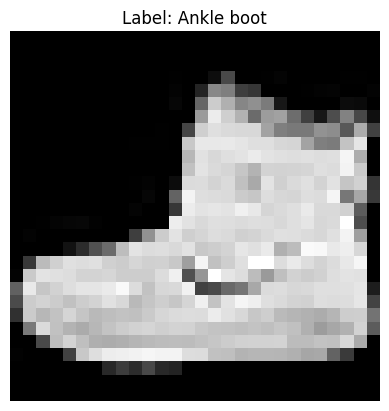

In [14]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize a sample image
plt.imshow(X[0], cmap='gray')
plt.title(f"Label: {class_names[y[0]]}")
plt.axis('off')
plt.show()

### From Scratch Implementation

#### Step 1: Standardize the Data

Before performing PCA, it's important to standardize the data because PCA is sensitive to the variances of the original variables. Variables with larger scales can dominate the principal components if data is not standardized.

##### **Mathematical Expression**

Given a dataset $X$ with $n$ samples and $p$ features, the standardized data $Z$ is computed as:

$$
Z_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$

Where:
- $X_{ij}$ is the value of the $j^{th}$ feature for the $i^{th}$ sample.
- $\mu_j$ is the mean of the $j^{th}$ feature.
- $\sigma_j$ is the standard deviation of the $j^{th}$ feature.

In [15]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_flattened)

# Display the shape of the standardized data
print(f"Standardized Data Shape: {X_standardized.shape}")

Standardized Data Shape: (70000, 784)


#### Step 2: Compute the Covariance Matrix

The covariance matrix expresses the correlation between different features in the data. It is a square matrix that provides the covariance between each pair of features.

##### **Mathematical Expression**

For standardized data $Z$, the covariance matrix $C$ is computed as:

$$
C = \frac{1}{n - 1} Z^T Z
$$

Where:
- $Z^T$ is the transpose of the standardized data matrix $Z$.
- $n$ is the number of samples.

**Note**: Since the number of features (784) is large, computing the full covariance matrix can be computationally intensive. Therefore, we may use techniques like Singular Value Decomposition (SVD) or truncated computations to handle large datasets.

In [16]:
# Compute the covariance matrix
# For large datasets, it's more efficient to compute the covariance matrix using numpy's dot product
n_samples = X_standardized.shape[0]
cov_matrix = np.dot(X_standardized.T, X_standardized) / (n_samples - 1)

# Display the shape of the covariance matrix
print(f"Covariance Matrix Shape: {cov_matrix.shape}")

# Display the covariance matrix
print(f"Covariance Matrix: \n{cov_matrix}")

Covariance Matrix Shape: (784, 784)
Covariance Matrix: 
[[1.00001429 0.25569492 0.06403707 ... 0.00832096 0.02411277 0.03740479]
 [0.25569492 1.00001429 0.67031323 ... 0.03704472 0.02827681 0.01687575]
 [0.06403707 0.67031323 1.00001429 ... 0.04097211 0.01920525 0.01368401]
 ...
 [0.00832096 0.03704472 0.04097211 ... 1.00001429 0.64789485 0.2373563 ]
 [0.02411277 0.02827681 0.01920525 ... 0.64789485 1.00001429 0.49068852]
 [0.03740479 0.01687575 0.01368401 ... 0.2373563  0.49068852 1.00001429]]


#### Step 3: Calculate Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are computed from the covariance matrix to identify the principal components. The eigenvectors represent the directions of maximum variance (principal components), and the eigenvalues indicate the magnitude of variance in those directions.

##### **Mathematical Expression**

We solve the equation:

$$
C \mathbf{v} = \lambda \mathbf{v}
$$

Where:
- $C$ is the covariance matrix.
- $\mathbf{v}$ is the eigenvector.
- $\lambda$ is the eigenvalue corresponding to $\mathbf{v}$.

**Note**: Computing eigenvalues and eigenvectors for large covariance matrices can be computationally intensive. We can use SVD to compute the principal components directly without computing the covariance matrix.

In [17]:
# Compute eigenvalues and eigenvectors using Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(X_standardized, full_matrices=False)

# Eigenvalues are the square of singular values divided by (n_samples - 1)
eig_values = (S ** 2) / (n_samples - 1)

# Eigenvectors are the transpose of V from SVD
eig_vectors = VT.T

# Display the shape of eigenvalues and eigenvectors
print(f"Eigenvalues Shape: {eig_values.shape}")
print(f"Eigenvectors Shape: {eig_vectors.shape}")

Eigenvalues Shape: (784,)
Eigenvectors Shape: (784, 784)


#### Step 4: Sort Eigenvectors by Eigenvalues in Descending Order

We sort the eigenvectors so that the principal components are ordered according to the amount of variance they explain.

##### **Process**

- Pair each eigenvalue with its corresponding eigenvector.
- Sort the pairs in descending order based on the eigenvalues.

In [18]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(eig_values[i], eig_vectors[:, i]) for i in range(len(eig_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Extract the sorted eigenvalues and eigenvectors
sorted_eig_values = np.array([eig_pair[0] for eig_pair in eig_pairs])
sorted_eig_vectors = np.array([eig_pair[1] for eig_pair in eig_pairs]).T

# Display the top 10 eigenvalues
print("Top 10 Eigenvalues:")
for i in range(10):
    print(f"Eigenvalue {i+1}: {sorted_eig_values[i]}")

Top 10 Eigenvalues:
Eigenvalue 1: 173.2060432240195
Eigenvalue 2: 112.91803609912502
Eigenvalue 3: 42.83391428357295
Eigenvalue 4: 39.9054926319995
Eigenvalue 5: 31.793060163590745
Eigenvalue 6: 23.63858355275506
Eigenvalue 7: 21.571295946859642
Eigenvalue 8: 18.162981328926374
Eigenvalue 9: 13.308333146651622
Eigenvalue 10: 10.359932413094969


#### Step 5: Project Data onto the Selected Principal Components

We construct a projection matrix using the top $k$ eigenvectors to transform the data into the new feature space (principal components).

##### **Mathematical Expression**

The projection matrix $W$ is formed by stacking the top $k$ eigenvectors:

$$
W = [\mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_k]
$$

The projected data $Z$ is obtained by:

$$
Z = X_{\text{standardized}} \cdot W
$$

Where:
- $X_{\text{standardized}}$ is the standardized data matrix.
- $W$ is the projection matrix containing the top $k$ eigenvectors.

In [19]:
# Select the top k eigenvectors (here we choose k=2 for visualization)
k = 2
matrix_w = sorted_eig_vectors[:, :k]

# Project the standardized data onto the new feature space
X_pca = X_standardized.dot(matrix_w)

# Create a DataFrame with the projected data
principal_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)])
principal_df['label'] = y

# Display the first 5 rows of the projected data
print("Projected Data (first 5 samples):")
print(principal_df.head())

Projected Data (first 5 samples):
         PC1        PC2  label
0  -0.824695  20.862604      9
1  17.073390  -4.966217      0
2  -9.600036 -12.321928      0
3  -0.310827 -11.590370      3
4   8.975907 -12.880551      0


#### Explained Variance Ratio

The explained variance ratio indicates how much variance is explained by each of the selected principal components.

Explained Variance Ratio for Top 10 Components:
PC1: 0.2209
PC2: 0.1440
PC3: 0.0546
PC4: 0.0509
PC5: 0.0406
PC6: 0.0302
PC7: 0.0275
PC8: 0.0232
PC9: 0.0170
PC10: 0.0132


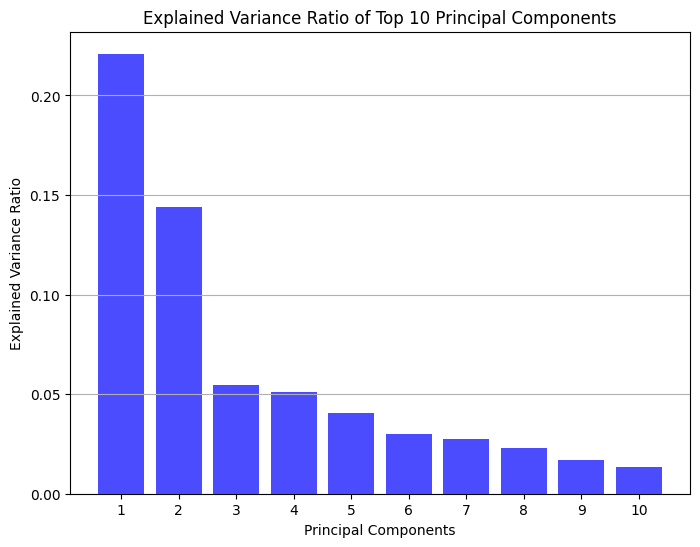

In [20]:
# Compute the explained variance ratio
explained_variance_ratio = sorted_eig_values / np.sum(sorted_eig_values)

# Display the explained variance ratio for the top 10 components
print("Explained Variance Ratio for Top 10 Components:")
for i in range(10):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f}")

# Plot the explained variance ratio for the top 10 components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
components = np.arange(1, 11)
plt.bar(components, explained_variance_ratio[:10], alpha=0.7, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Top 10 Principal Components')
plt.xticks(components)
plt.grid(axis='y')
plt.show()

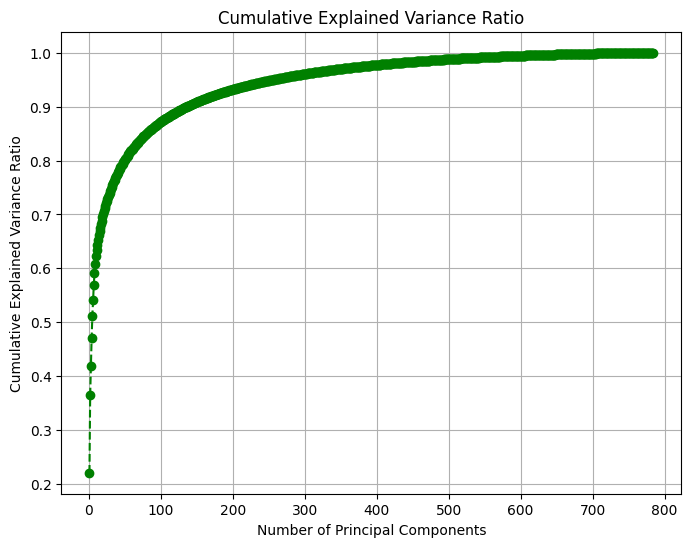

In [21]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


#### Visualization of the Projected Data

Now, we can visualize the data in the new feature space defined by the first two principal components.

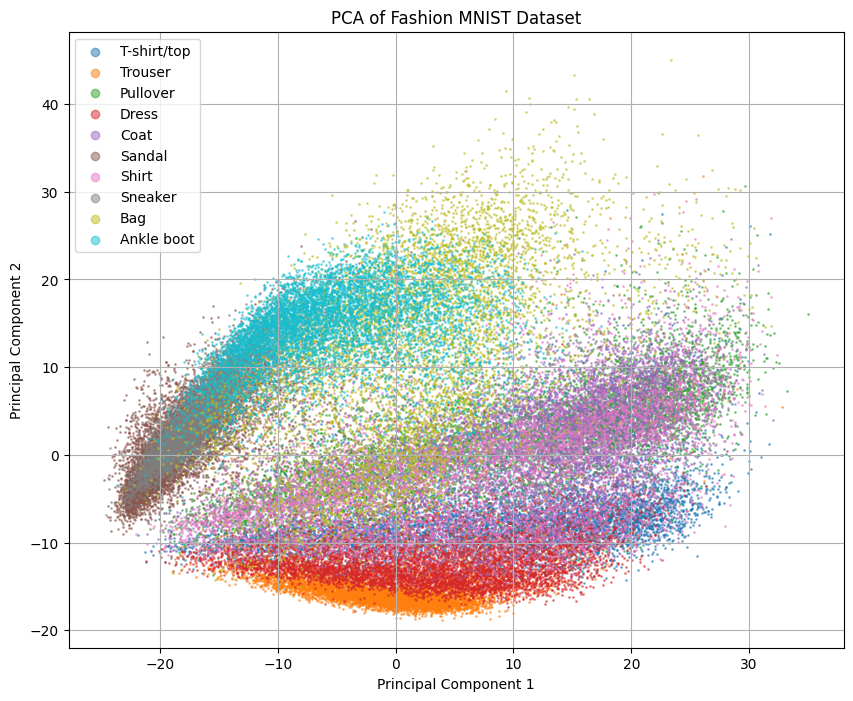

In [22]:
# Plot the projected data
plt.figure(figsize=(10,8))

for label in np.unique(y):
    indices = principal_df['label'] == label
    plt.scatter(principal_df.loc[indices, 'PC1'],
                principal_df.loc[indices, 'PC2'],
                s=1, alpha=0.5, label=class_names[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset')
plt.legend(markerscale=6)
plt.grid()
plt.show()

### PCA using Scikit-Learn's PCA Function

While we've implemented PCA step by step, scikit-learn provides a convenient and optimized `PCA` class that performs PCA efficiently. It handles the computations internally and offers additional functionality, such as selecting the number of components based on the explained variance ratio.

#### **Scikit-Learn PCA Parameters**

- `n_components`: Number of principal components to keep. If `n_components` is between 0 and 1, it selects the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by `n_components`.
- `whiten`: When `True`, the components are multiplied by the square root of the eigenvalues to ensure uncorrelated outputs with unit variance.
- `svd_solver`: Specifies the algorithm to use for computation. Options include `'auto'`, `'full'`, `'arpack'`, and `'randomized'`.

#### **Advantages**

- Optimized for performance and can handle large datasets efficiently.
- Simplifies the process with fewer lines of code.
- Provides additional features like inverse transformation, which can be useful for tasks like data reconstruction.

In [23]:
# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
k = 2  # Number of principal components
pca = PCA(n_components=k)

# Fit PCA on the standardized data
X_pca_sklearn = pca.fit_transform(X_standardized)

# Create a DataFrame with the projected data
principal_df_sklearn = pd.DataFrame(X_pca_sklearn, columns=[f'PC{i+1}' for i in range(k)])
principal_df_sklearn['label'] = y

# Display the explained variance ratio
print("Explained Variance Ratio by scikit-learn PCA:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

Explained Variance Ratio by scikit-learn PCA:
PC1: 0.2209
PC2: 0.1440


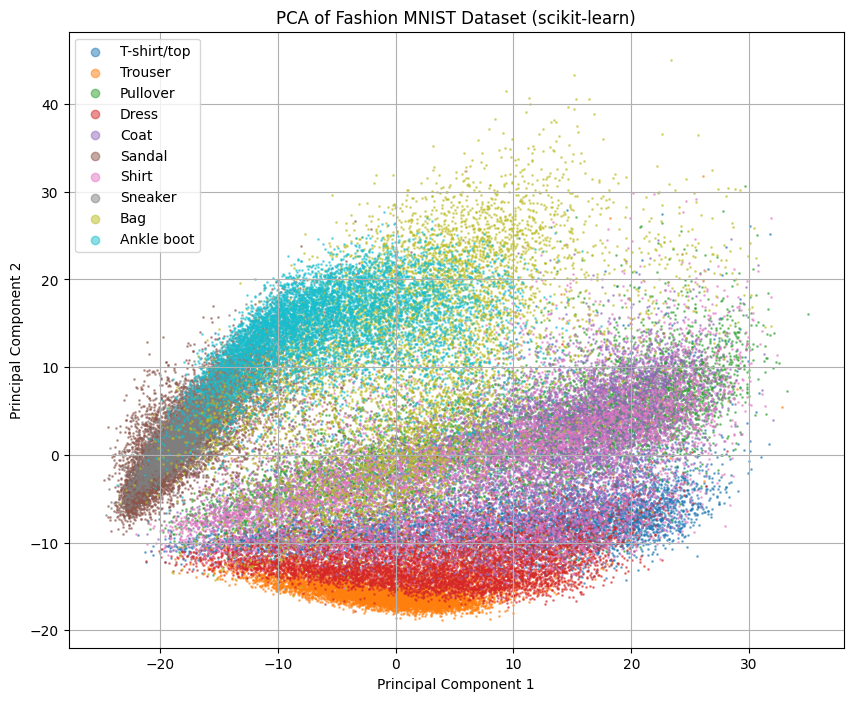

In [24]:
# Plot the projected data using scikit-learn PCA
plt.figure(figsize=(10, 8))

# No sampling - use the entire dataset
for label in np.unique(principal_df_sklearn['label']):
    label_indices = principal_df_sklearn['label'] == label
    plt.scatter(principal_df_sklearn.loc[label_indices, 'PC1'],
                principal_df_sklearn.loc[label_indices, 'PC2'],
                s=1, alpha=0.5, label=class_names[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset (scikit-learn)')
plt.legend(markerscale=6)
plt.grid()
plt.show()

#### Comparison and Discussion

- **Consistency**: The results obtained using scikit-learn's PCA are consistent with our step-by-step implementation.
- **Efficiency**: Scikit-learn's PCA is optimized and may be more efficient, especially for large datasets.
- **Explained Variance**: We can easily access the explained variance ratio using the `explained_variance_ratio_` attribute.
- **Ease of Use**: Scikit-learn simplifies the PCA process with fewer lines of code and additional functionalities.

## 4. Case Study: Leukemia Gene Expression Dataset

### Dataset Description

The **Leukemia Gene Expression Dataset** consists of 72 samples with 7,129 gene expression features. The dataset includes two classes of leukemia:

- **Acute Myeloid Leukemia (AML)**
- **Acute Lymphoblastic Leukemia (ALL)**

Due to the high dimensionality (7,129 features) and the small number of samples (72), this dataset is prone to overfitting. Dimensionality reduction techniques like PCA can be effective in preventing overfitting by reducing the number of features.

### Data Preprocessing and Visualization

We will:

- Load the dataset.
- Preprocess the data.
- Apply PCA to reduce dimensionality.
- Visualize the results.
- Evaluate the performance of a logistic regression classifier with and without PCA.

In [30]:
# Import necessary libraries

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Load the Leukemia dataset from OpenML

Leukemia = fetch_openml(data_id= 1104, as_frame=False)
X = Leukemia.data
y = Leukemia.target

# Convert labels to binary (0 and 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"Dataset Shape: {X.shape}")
print (f"Number fo Classes:{len(np.unique(y_encoded))}")


Dataset Shape: (72, 7129)
Number fo Classes:2


### Data Preprocessing

- **Standardize the Data**: Standardizing features by removing the mean and scaling to unit variance.

In [26]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Model Training and Evaluation

- **Define a Logistic Regression Model**
- **Perform Stratified K-Fold Cross-Validation**
- **Evaluate Model Performance Without PCA**

In [31]:
# Define a logistic regression model
model = LogisticRegression(max_iter=1000, solver="saga")

# Stratified K-fold cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation without PCA
scores_no_pca = cross_val_score(model,X_scaled, y_encoded, cv=cv, scoring= "accuracy")
mean_scores_no_pca = np.mean(scores_no_pca)

print(f"\nCross-validation accuracy without PCA:{mean_scores_no_pca:.4f}")


Cross-validation accuracy without PCA:0.8495


### Applying PCA

- **Reduce Dimensionality Using PCA**
- **Evaluate Model Performance With PCA**

In [32]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Cross-validation with PCA
scores_pca = cross_val_score(model, X_pca, y_encoded, cv=cv, scoring='accuracy')
mean_score_pca = np.mean(scores_pca)

print(f"Cross-validation accuracy with PCA (20 components): {mean_score_pca:.4f}")

Cross-validation accuracy with PCA (20 components): 0.9029


### Experimenting with Different Numbers of Components

In [33]:
# Optional: Experiment with different numbers of components
components = [5, 10, 20, 50]
scores = []

for n in components:
    pca = PCA(n_components=n, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    score = np.mean(cross_val_score(model, X_pca, y_encoded, cv=cv, scoring='accuracy'))
    scores.append(score)
    print(f"Accuracy with PCA ({n} components): {score:.4f}")

Accuracy with PCA (5 components): 0.9314
Accuracy with PCA (10 components): 0.8905
Accuracy with PCA (20 components): 0.9029
Accuracy with PCA (50 components): 0.8752


### Results Visualization

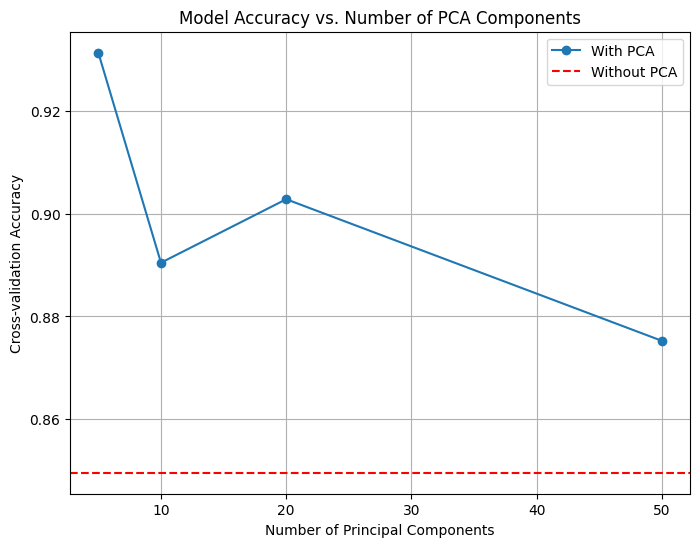

In [35]:
# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(components, scores, marker='o', label='With PCA')
plt.axhline(y=mean_scores_no_pca, color='r', linestyle='--', label='Without PCA')
plt.title('Model Accuracy vs. Number of PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Results and Analysis

- **Cross-validation accuracy without PCA**: `0.8629`

- **Cross-validation accuracies with PCA**: `0.9029`

  <table>
  <tr>
    <th>Number of Components</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>5</td>
    <td>0.9314</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.8905</td>
  </tr>
  <tr>
    <td>20</td>
    <td>0.9029</td>
  </tr>
  <tr>
    <td>50</td>
    <td>0.8752</td>
  </tr>
</table>


**Plot**:

- The plot shows the model accuracy vs. the number of principal components used.

**Interpretation**:

- Without PCA, the model may overfit due to the high dimensionality and small sample size.
- With PCA, reducing the dimensionality helps prevent overfitting and may improve model performance.
- The optimal number of principal components balances between retaining enough variance and reducing dimensionality.

### Conclusion

- PCA can effectively reduce overfitting in high-dimensional datasets like the Leukemia Gene Expression Dataset.
- Selecting the appropriate number of principal components is crucial for optimal performance.

## 5. Other Dimensionality Reduction Methods

### t-SNE and UMAP

While PCA is a powerful linear dimensionality reduction technique, it may not capture complex non-linear relationships in the data. To address this, we can use non-linear dimensionality reduction methods like **t-SNE** and **UMAP**.

- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**:
  - Focuses on preserving local relationships (neighboring points) in high-dimensional data when mapped to lower dimensions.
  - Useful for visualizing clusters in data.
  - Computationally intensive for large datasets.

- **UMAP (Uniform Manifold Approximation and Projection)**:
  - Preserves both local and some global structure of data.
  - Generally faster than t-SNE and scales better to large datasets.
  - Based on manifold learning techniques and topological data analysis.

In this section, we'll apply PCA, t-SNE, and UMAP to the MNIST dataset and visualize the results.

In [37]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Convert labels to integers
y = y.astype(int)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of samples you want in total
sample_size = 2000

# Number of unique labels/classes
num_classes = len(np.unique(y))

# Number of samples per class
samples_per_class = sample_size // num_classes

# Ensure sample_size is divisible by num_classes
sample_size = samples_per_class * num_classes

print(f"Total sample size adjusted to {sample_size} to evenly distribute among classes.")

# Initialize lists to collect indices
indices_list = []

# Set random seed for reproducibility
np.random.seed(42)

# For each class, randomly select samples_per_class indices
for class_label in np.unique(y):
    # Find indices of all samples with the current class label
    class_indices = np.where(y == class_label)[0]
    # Randomly select samples_per_class indices from the class_indices
    selected_indices = np.random.choice(class_indices, size=samples_per_class, replace=False)
    # Add the selected indices to the list
    indices_list.extend(selected_indices)

# Convert list of indices to a numpy array
indices = np.array(indices_list)

# Shuffle the indices to mix the classes
np.random.shuffle(indices)

# Get the sampled data and labels
X_sample = X_scaled[indices]
y_sample = y[indices]

print(f"Sampled data shape: {X_sample.shape}")
print(f"Sampled labels distribution: {np.bincount(y_sample)}")

Total sample size adjusted to 2000 to evenly distribute among classes.
Sampled data shape: (2000, 784)
Sampled labels distribution: [200 200 200 200 200 200 200 200 200 200]


### PCA on MNIST

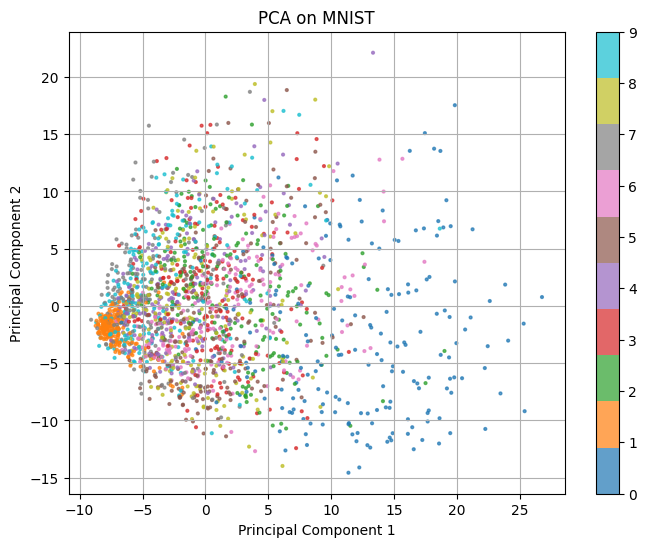

In [38]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# Plot the PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10', s=4, alpha=0.7)
plt.title('PCA on MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()

### t-SNE on MNIST

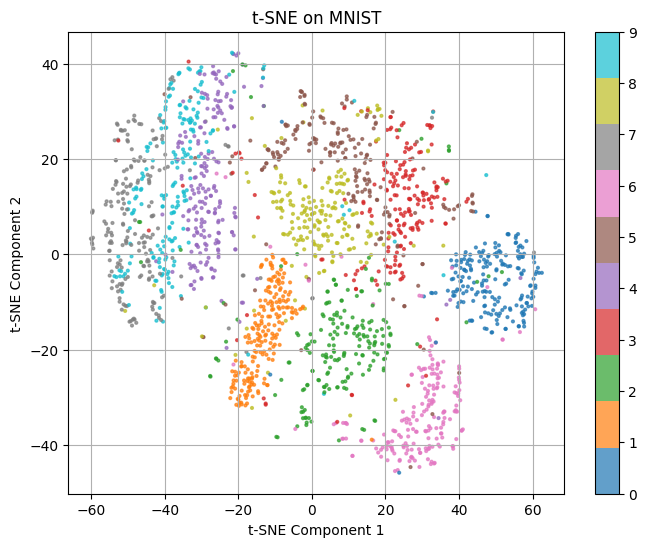

In [39]:
# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_sample)

# Plot the t-SNE result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='tab10', s=4, alpha=0.7)
plt.title('t-SNE on MNIST')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()

### UMAP on MNIST

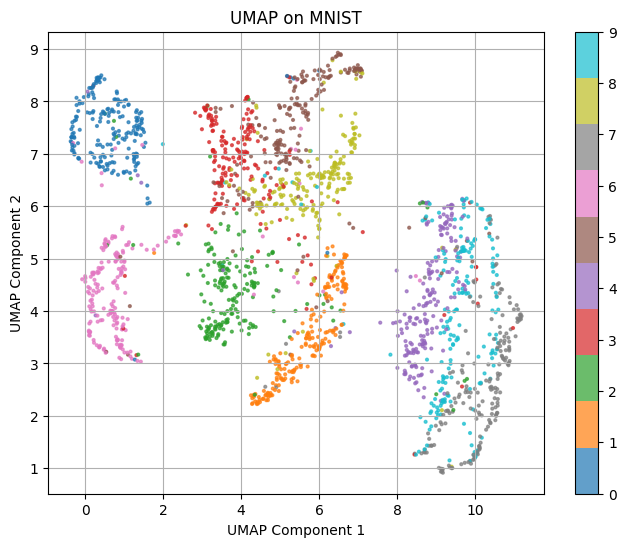

In [40]:
# Apply UMAP to reduce to 2 dimensions
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_sample)

# Plot the UMAP result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sample, cmap='tab10', s=4, alpha=0.7)
plt.title('UMAP on MNIST')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()

### Comparison and Discussion

- **PCA**:
  - Linear method; captures the directions of maximum variance.
  - The plot may show overlapping clusters due to its linear nature.

- **t-SNE**:
  - Non-linear method focusing on preserving local structure.
  - Often shows well-separated clusters, making it useful for visualization.
  - Computationally intensive; slower on large datasets.

- **UMAP**:
  - Non-linear method that preserves both local and some global structure.
  - Generally faster than t-SNE and scales better to large datasets.
  - Can capture more complex structures in the data.

From the visualizations, we can observe how each method reduces the dimensionality of the MNIST dataset and the extent to which they separate the different digit classes.